In [17]:
import warnings
import pandas as pd

# FutureWarning 경고 메시지를 무시하도록 설정
warnings.simplefilter(action="ignore", category=FutureWarning)

Task1_0724. Wine 데이터셋에 대하여 SVM 모델에 3개의 커널을 적용하여 학습 및 평가 결과를 출력하세요. 

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

wine = load_wine()
X = wine.data
y = wine.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kernels = ['linear','poly', 'rbf']

accuracy_dict = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, C=1, random_state=10)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[kernel] = accuracy
    print(f"커널 {kernel}일때 정확도 : {accuracy:.4f}")

커널 linear일때 정확도 : 1.0000
커널 poly일때 정확도 : 0.8333
커널 rbf일때 정확도 : 0.8056


## ex1

커널 linear일때 matrix : 
[[14  0  0]
 [ 0 13  1]
 [ 0  0  8]]
classification_report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



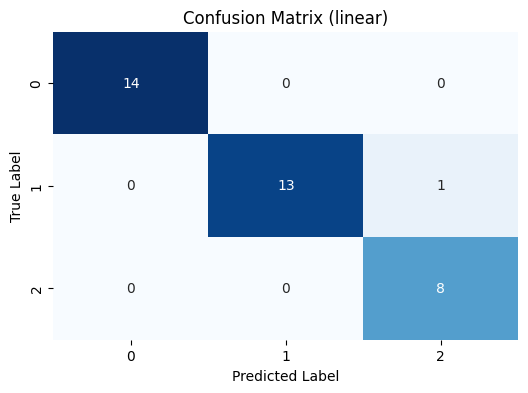

커널 poly일때 matrix : 
[[13  1  0]
 [ 0 14  0]
 [ 0  0  8]]
classification_report : 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



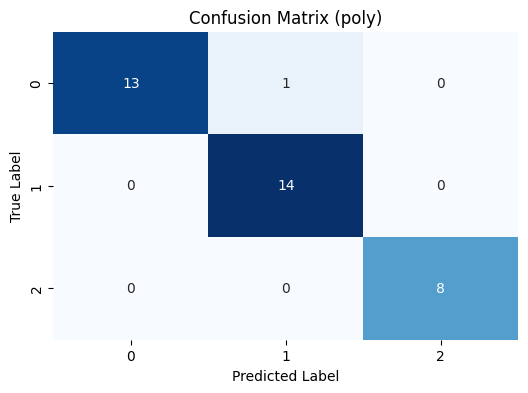

커널 rbf일때 matrix : 
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
classification_report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



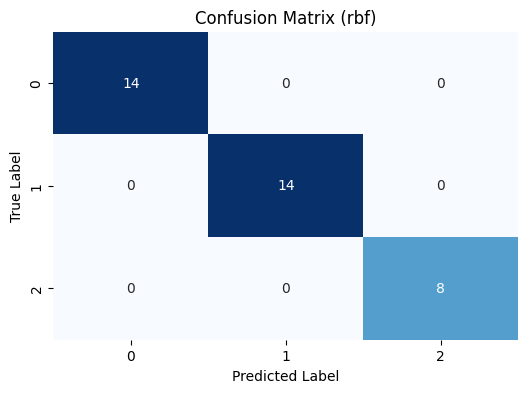

In [10]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

wine = load_wine()
X = wine.data
y = wine.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kernels = ["linear", "poly", "rbf"]

accuracy_dict = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, C=1, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[kernel] = accuracy
    matrix = confusion_matrix(y_test, y_pred)
    print(f"커널 {kernel}일때 matrix : \n{matrix}")
    print(f"classification_report : \n{classification_report(y_test, y_pred)}")    
    
    #visualize
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix ({kernel})")
    plt.show()
    

실제 평가 결과를 통해 각 커널의 성능을 비교해 보면 다음과 같은 결론을 얻을 수 있습니다:

- Linear Kernel: 데이터가 선형적으로 분리될 수 있는 경우 적합합니다. Wine 데이터셋에서 높은 정확도를 보입니다.
- Polynomial Kernel: 데이터가 다항식 경계를 가질 때 적합합니다. Wine 데이터셋에서는 선형 커널에 비해 다소 낮은 정확도를 보일 수 있습니다.
- RBF Kernel: 데이터가 비선형 경계를 가질 때 적합합니다. Wine 데이터셋에서 매우 높은 정확도를 보입니다.

Wine 데이터셋에서는 Linear Kernel이 가장 적합할 수 있습니다. 이는 데이터가 선형적으로 잘 분리될 수 있기 때문입니다. 그러나 실제로는 각 커널의 성능을 교차 검증(그룹을 나눠 돌리는 방법)을 통해 비교하고, 데이터의 특성에 따라 최적의 커널을 선택합니다.

Task2_0724. breast_cancer dataset으로 랜덤포레스트를 적용하여 모델링 및 평가를 아래의 하이퍼 파라미터를 이용하여 수행한 후 최적의 하이퍼파라미터를 구하세요.

- 'n_estimators': [50, 100, 200],
- 'max_depth': [None, 10, 20],
- 'max_features': ['auto', 'sqrt', 'log2'],
- 'min_samples_split': [2, 5, 10],
- 'min_samples_leaf': [1, 2, 4]

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

wine = load_breast_cancer()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators = [50, 100, 200]
max_depth = [None, 10, 20]
max_features = ['auto', 'sqrt', 'log2']
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# clf = RandomForestClassifier(n_estimators=100, random_state=42)

for estimator in n_estimators:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(f'n estmator {estimator} 의 정확도 : {accuracy_score(y_test, pred):.4f} ')

n estmator 50 의 정확도 : 0.9649 
n estmator 100 의 정확도 : 0.9649 
n estmator 200 의 정확도 : 0.9649 


In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

wine = load_breast_cancer()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

n_estimators = [50, 100, 200]
max_depth = [None, 10, 20]
max_features = ["auto", "sqrt", "log2"]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# clf = RandomForestClassifier(n_estimators=100, random_state=42)

for depth in max_depth:
    clf = RandomForestClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(f"max depth {depth} 의 정확도 : {accuracy_score(y_test, pred):.4f} ")

max depth None 의 정확도 : 0.9649 
max depth 10 의 정확도 : 0.9649 
max depth 20 의 정확도 : 0.9649 


In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

wine = load_breast_cancer()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

n_estimators = [50, 100, 200]
max_depth = [None, 10, 20]
# max_features = ["auto", "sqrt", "log2"]
max_features = ["sqrt", "log2"]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# clf = RandomForestClassifier(n_estimators=100, random_state=42)

for feature in max_features:
    clf = RandomForestClassifier(max_features=feature, random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(f"max feature {feature} 의 정확도 : {accuracy_score(y_test, pred):.4f} ")

max feature sqrt 의 정확도 : 0.9649 
max feature log2 의 정확도 : 0.9649 


In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

wine = load_breast_cancer()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

n_estimators = [50, 100, 200]
max_depth = [None, 10, 20]
# max_features = ["auto", "sqrt", "log2"]
max_features = ["sqrt", "log2"]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# clf = RandomForestClassifier(n_estimators=100, random_state=42)

for split in min_samples_split:
    clf = RandomForestClassifier(min_samples_split=split, random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(
        f"min samples split {split} 의 정확도 : {accuracy_score(y_test, pred):.4f} "
    )

min samples split 2 의 정확도 : 0.9649 
min samples split 5 의 정확도 : 0.9649 
min samples split 10 의 정확도 : 0.9649 


In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

wine = load_breast_cancer()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

n_estimators = [50, 100, 200]
max_depth = [None, 10, 20]
# max_features = ["auto", "sqrt", "log2"]
max_features = ["sqrt", "log2"]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# clf = RandomForestClassifier(n_estimators=100, random_state=42)

for leaf in min_samples_leaf:
    clf = RandomForestClassifier(min_samples_leaf=leaf, random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(f"min_samples_leaf {leaf} 의 정확도 : {accuracy_score(y_test, pred):.4f} ")

min_samples_leaf 1 의 정확도 : 0.9649 
min_samples_leaf 2 의 정확도 : 0.9649 
min_samples_leaf 4 의 정확도 : 0.9649 


## ex2

n_estimators: 10
Accuracy: 0.96
Confusion Matrix:
[[ 60   3]
 [  3 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



n_estimators: 50
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



n_estimators: 100
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

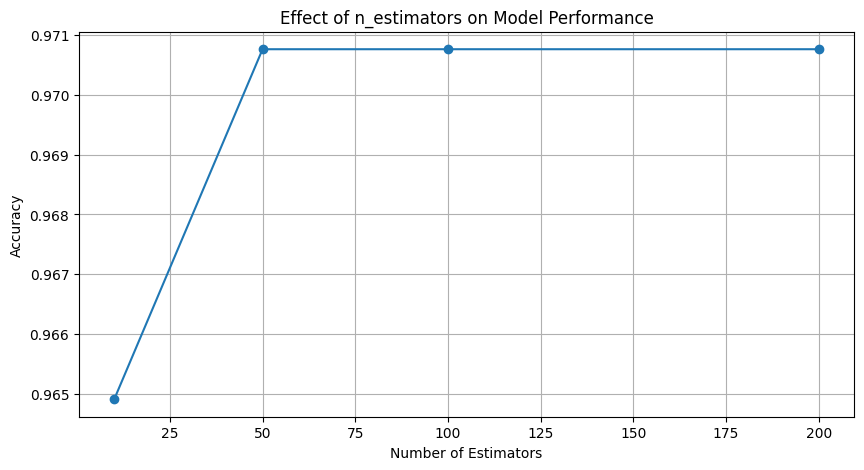

max_depth: 5
Accuracy: 0.96
Confusion Matrix:
[[ 59   4]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



max_depth: 10
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



max_depth: 20
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

         

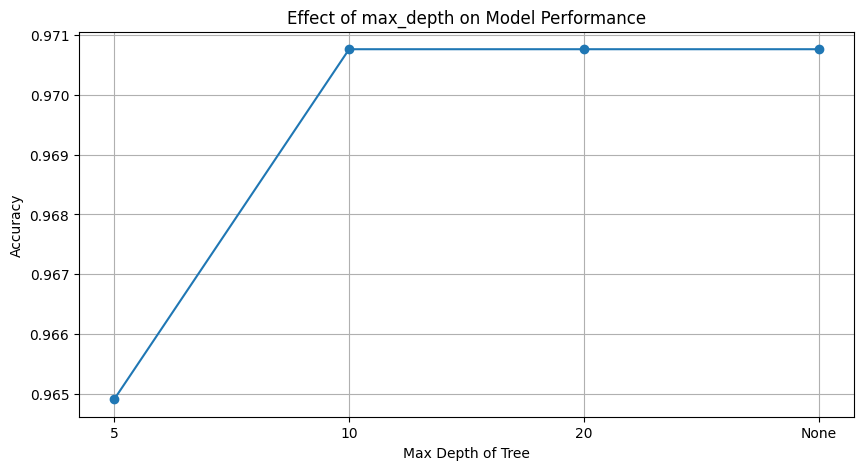

max_features: sqrt
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



max_features: log2
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171





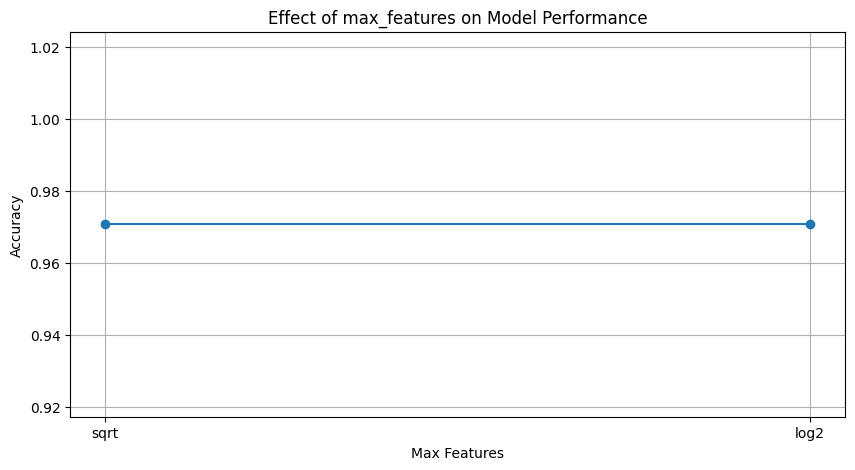

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드 및 분할
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.3, random_state=42
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 데이터 로드 및 분할
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.3, random_state=42
)

# 1. n_estimators (트리의 개수)
n_estimators_range = [10, 50, 100, 200]
n_estimators_scores = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    n_estimators_scores.append(score)
    print(f"n_estimators: {n}")
    print(f"Accuracy: {score:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "=" * 60 + "\n")

# n_estimators 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, n_estimators_scores, marker="o")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Effect of n_estimators on Model Performance")
plt.grid(True)
plt.show()

# 2. max_depth (트리의 최대 깊이)
max_depth_range = [5, 10, 20, None]
max_depth_scores = []

for depth in max_depth_range:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    max_depth_scores.append(score)
    print(f"max_depth: {depth}")
    print(f"Accuracy: {score:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "=" * 60 + "\n")

# max_depth 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot([str(d) for d in max_depth_range], max_depth_scores, marker="o")
plt.xlabel("Max Depth of Tree")
plt.ylabel("Accuracy")
plt.title("Effect of max_depth on Model Performance")
plt.grid(True)
plt.show()

# 3. max_features (각 분할에서 고려할 최대 특성 수)
max_features_range = ["sqrt", "log2"]
max_features_scores = []

for feature in max_features_range:
    rf = RandomForestClassifier(max_features=feature, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    max_features_scores.append(score)
    print(f"max_features: {feature}")
    print(f"Accuracy: {score:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "=" * 60 + "\n")

# max_features 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(max_features_range, max_features_scores, marker="o")
plt.xlabel("Max Features")
plt.ylabel("Accuracy")
plt.title("Effect of max_features on Model Performance")
plt.grid(True)
plt.show()

### GridSearchCV 사용

- 파라미터 레인지는 줘야함
- 결과로 나온 값이 레이지 경계면 그 이상을 해볼 수 있음.
- 교차 검증도 가능
  

모델별 피쳐임포턴스가 있어서 중복되는 피쳐가 있다면 고려대상

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
best parameters found : {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.92
Confusion Matrix:
[[134  15]
 [ 15 234]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       149
           1       0.94      0.94      0.94       249

    accuracy                           0.92       398
   macro avg       0.92      0.92      0.92       398
weighted avg       0.92      0.92      0.92       398

오차 행렬
[[134  15]
 [ 15 234]]
평가 함수 결과 :
정확도 : 0.9246, 정밀도 : 0.9398, 재현율 : 0.9398, F1 : 0.9398, ROC AUC : 0.9840


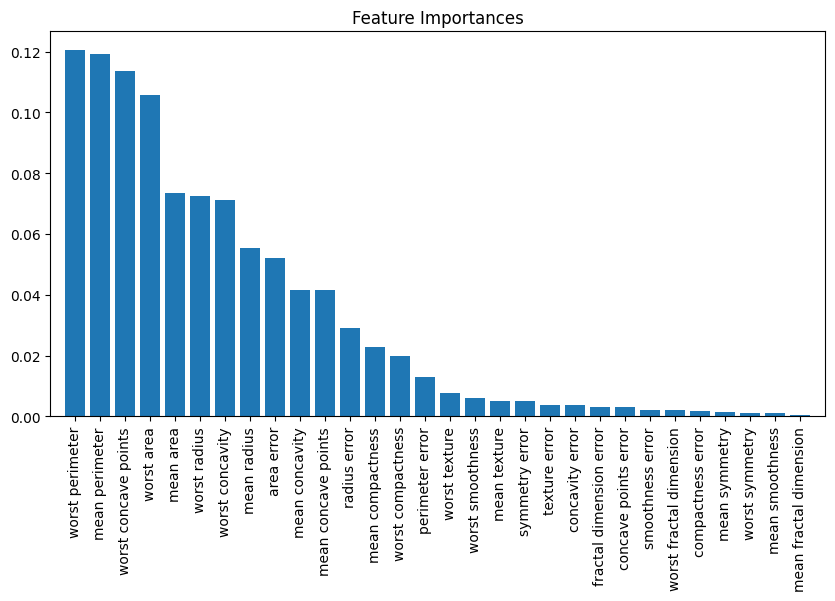

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

cancer = load_breast_cancer()

X_test, X_train, y_test, y_train = train_test_split(
    cancer.data, cancer.target, test_size=0.3, random_state=42
)
# 파라미터 그리드 생성
param_grid = {
    "n_estimators": [10, 50, 200],
    "max_depth": [5, 10, 20, None],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}
# 모델 생성
rf = RandomForestClassifier(random_state=42)
# 그리드 서치 객체 생성
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print(f'best parameters found : {grid_search.best_params_}')

# 최적 모델로 예측 수행
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    f1_score,
    roc_auc_score,
)

# 평가 함수 정의
pred_proba = best_rf.predict_proba(X_test)[:, 1]

def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print("오차 행렬")
    print(confusion)
    # ROC-AUC print 추가
    print(
        f"평가 함수 결과 :\n정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, F1 : {f1:.4f}, ROC AUC : {roc_auc:.4f}"
    )
    
get_clf_eval(y_test, y_pred, pred_proba)


# 결과 시각화
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), cancer.feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def trian_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    print(confusion, accuracy, precision, recall, f1, roc_auc)
    
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

param_grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth' :[None, 10, 20],
    'max_features' : ['sqrt','log2'],
    'min_sample_split' : [2, 5, 10],
    'min_sample_'
    
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf , param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

best_rf = grid_search.best_estimator_

trian_and_evaluate(best_rf, X_train, X_test, y_train, y_test)



Task3_0724. 데이터셋 개선, 오늘 배운 모델 적용, 탐색적분석을 통한 파생변수 적용하고 설명

In [6]:
# 데이터셋 개선
import pandas as pd
data = pd.read_csv("adult_incomes.csv")
data.dropna(inplace=True)
# 이상치 제거 data['capital-gain'] max값 제거
data = data[data["capital-gain"] < 99990]

# 파생변수 작성
data["capital_diff"] = data["capital-gain"] - data["capital-loss"]

In [8]:
# 추가 파생변수 작성 - 나이 카테고리화
data.age.describe()

count    30014.000000
mean        38.399747
std         13.134518
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [9]:
ages = data.age.values
category = ['teenager','young adult','adult','elderly']
data['age_cat'] = pd.cut(ages, bins=[17, 28, 37,47, 90], labels=category)

In [10]:
# 범주형 변수 인코딩
categorical_features = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
    "age_cat",
]

data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30014 entries, 0 to 32560
Columns: 101 entries, age to age_cat_elderly
dtypes: bool(94), int64(7)
memory usage: 4.5 MB


In [12]:
# 변수 선택및 독립변수 , 종속변수 분리
X = data.drop("income_>50K", axis=1)
y = data["income_>50K"]

In [13]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
# 분류 모델 적용
# 결정 트리

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.8094


In [16]:
# knn

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.8301


In [17]:
# svm
from sklearn.svm import SVC

kernels = ["linear", "poly", "rbf"]

accuracy_dict = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, C=1, random_state=10)
    svm.fit(X_train, y_train)
    pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    accuracy_dict[kernel] = accuracy
    print(f"커널 {kernel}일때 정확도 : {accuracy:.4f}")

커널 linear일때 정확도 : 0.8494
커널 poly일때 정확도 : 0.8411
커널 rbf일때 정확도 : 0.8492


In [19]:
# 앙상블 기법
# 정확도 높았던 knn과 svm의 linear커널 조합
from sklearn.ensemble import VotingClassifier


knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', C=1, random_state=10)

vo_clf = VotingClassifier(estimators=[('KNN', knn),('SVC',svm)], voting='hard')

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print("Voting 분류기 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

classifiers = [knn, svm]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print(f"{class_name} 정확도: {accuracy_score(y_test, pred):.4f}")

Voting 분류기 정확도: 0.8407
KNeighborsClassifier 정확도: 0.8301
SVC 정확도: 0.8494


In [20]:
# 랜덤 포레스트

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f"랜덤 포레스트 정확도: {accuracy:.4f}")

랜덤 포레스트 정확도: 0.8557


가장 높은 정확도를 보이는 것은 랜덤 포레스트 모델